In [2]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

In [4]:
# Load the stored data object
save_file = './write/ddk_ctrl.h5ad'
adata_ctrl = sc.read_h5ad(save_file)

# Load the stored data object
save_file = './write/ddk_ko.h5ad'
adata_ko = sc.read_h5ad(save_file)




In [5]:
adata_ctrl

AnnData object with n_obs × n_vars = 837 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [6]:
adata_ko

AnnData object with n_obs × n_vars = 1080 × 31056
    var: 'gene_ids', 'feature_types'

In [7]:
adata_ko.obs['sample'] = 'ko'

adata_ctrl.obs['sample'] = 'control'

In [8]:
adata = adata_ctrl.concatenate(adata_ko)

In [9]:
adata

AnnData object with n_obs × n_vars = 1917 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt-0', 'ribo-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0'

In [10]:
print(adata.obs['sample'].value_counts())


ko         1080
control     837
Name: sample, dtype: int64


In [11]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [12]:
sc.pp.log1p(adata)


In [13]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 5364


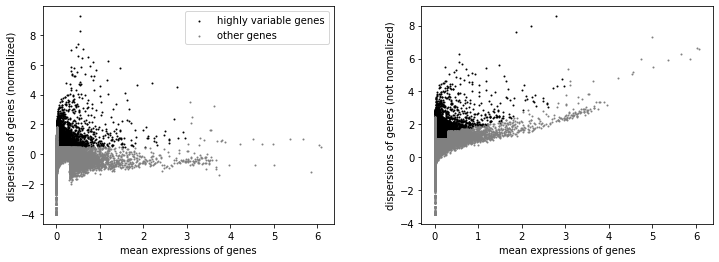

In [14]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

In [15]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [17]:

# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [18]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


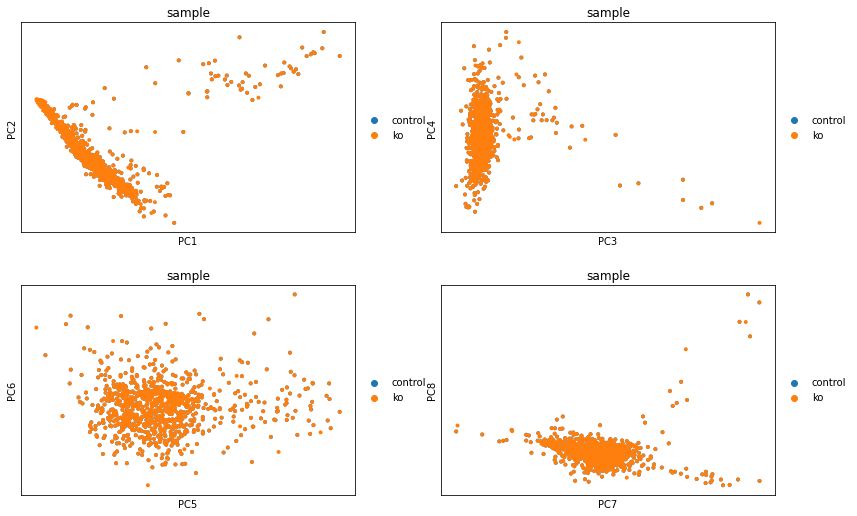

In [19]:
 #plot more PCS

sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

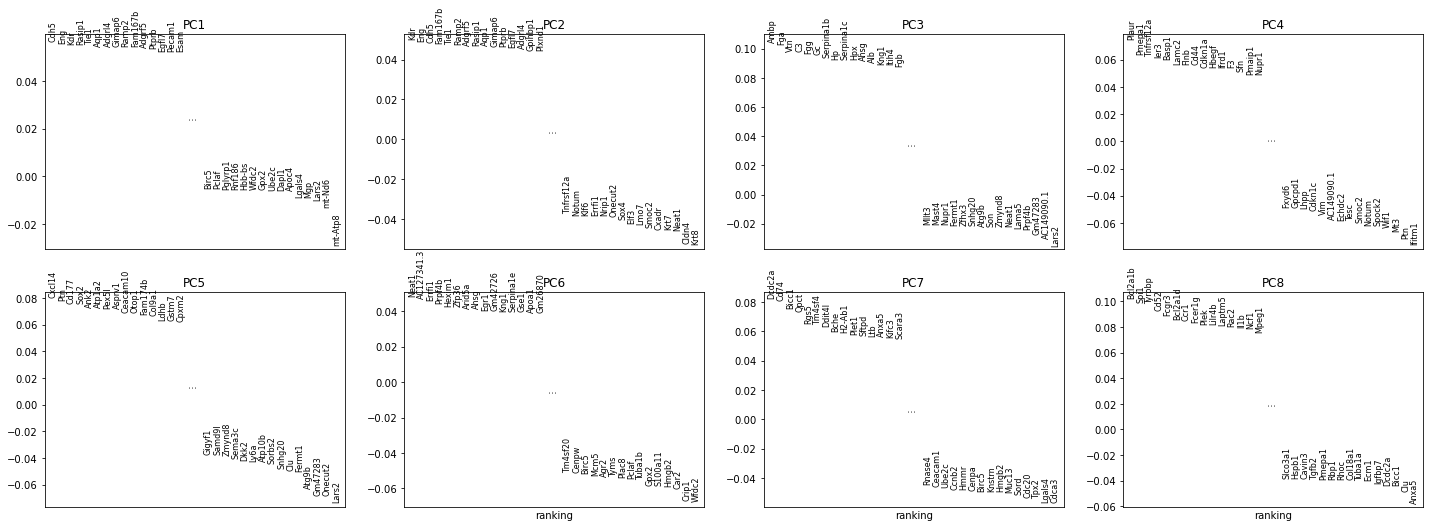

In [20]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

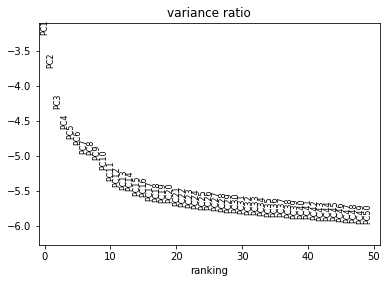

In [21]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


In [22]:
sc.tl.tsne(adata, n_pcs = 30)


computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:06)


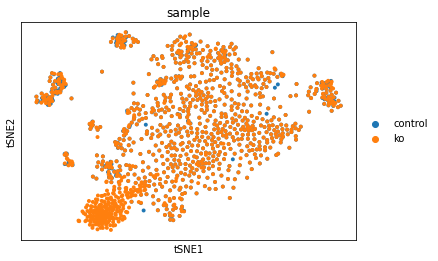

In [23]:
sc.pl.tsne(adata, color='sample')


In [24]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [25]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


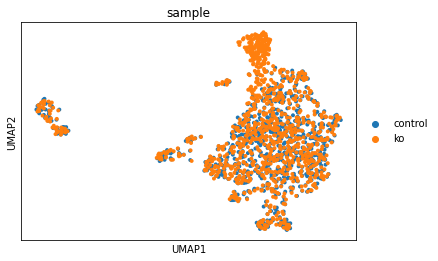

In [26]:
sc.pl.umap(adata, color='sample')


In [27]:
adata.write_h5ad('./write/dkk2_merged_umap.h5ad')
